## Camera Calibration (15 marks)
----

In this section, we provide 40 images of 3D checkerboards from a video for camera calibration. You can find these images in the "data/camera_calib" folder. These frames contain two checkerboards with 20 mm and 40 mm grid sizes. Image 01\~14 is the checkerboard with a grid size of 40 mm, and image 15\~40 is the checkerboard with a grid size of 20 mm. The images are taken from different angles with different surroundings.    



The tasks you need to complete are:
* Choose **one image** for the calibration and explain why you choose it. (5 marks)
* After the chosen, please use this image to calibrate the camera, which needs to calculate the intrinsic matrix $\mathbf{K}$, rotation matrix $\mathbf{R}$, and translation vector $\mathbf{t}$. (10 marks)

#### The camera calibration process:
---
1. Detect keypoints of the checkerboard
2. Fix the world coordinate and get the corresponding keypoints world coordinate. **Please fix the world coordinate as a right-handed coordinate and z-axis up (example as follow)**

<table>
<td> 
<img src='./data/checkerboard/checkerboard_1.png' style='zoom:50%' ><br>
</td> 
<td> 
<img src='./data/checkerboard/checkerboard_2.png' style='zoom:50%' > 
</td> 
</table>
<caption><center> Figure 1: two checkerboards and the world coordinates</center></caption>

3. Generate equations with 3D-2D matching pair
4. Solve projection matrix $\mathbf{P}$ with equations
5. Decompose $\mathbf{K}$,$\mathbf{R}$, $\mathbf{t}$ from $\mathbf{P}$

Please follow the steps and complete the camera calibration using the image you have chosen.


### Task 1 : Choose **one image** for the calibration and explain why you choose it. (5 marks)
----
The image that will be chosen for calibration would be image 30 that has 20mm squares. The reason for this is that this image would make a more accurate calibration since it's parallel to the camera and roughly in the middle of the camera view. Besides, the image is not noisy.


### Task 2 : Calculate the intrinsic matrix $\mathbf{K}$, rotation matrix $\mathbf{R}$, and translation vector $\mathbf{t}$. (10 marks)
----
please code below to calculate the required parameters and enter your final result of $\mathbf{K}$, $\mathbf{R}$, $\mathbf{t}$ here
...

Tips: Tutorial 1 can be the reference. 

In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt


In [2]:
def detect_keypoints(img,checkerboard_size):
    '''
    find checkerboard keypoints
    
    Args:
        image (np.ndarray): Image (height x width x 3).
        checkerboard size (int,int): Number of inner corners per a chessboard row and column
        
    Returns:
        np.ndarray: Output array of detected corners (inner corners number x 2). 
    ''' 
    ret,corners=cv2.findChessboardCorners(img,checkerboard_size,None)
    # refine the corner locations with sub-pixel accuracy
    if ret==True:
        criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 3, 0.1) # stop after 3 iterations or the accuracy of 0.1 is achieved
        img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        corners2=cv2.cornerSubPix(img_gray,corners,(5,5),(-1,-1),criteria) 
        img_points.append(corners2)

    img_corner=cv2.drawChessboardCorners(img,checkerboard_size,corners2,ret) # draw detected corners
    img_corner2 = img_corner[:,:,::-1] 	# transform image from bgr to rgb
    plt.figure(figsize=(60,60))
    plt.imshow(img_corner2)
    plt.show()
#     cv2.imshow('img with detected corners', img_corner)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

    return np.reshape(img_points, (-1, 2))




# plt.imshow(img)
# # -------you can also load the checkerboard keypoints in pixel direcly------
# img_points = np.load('img_points.npy')
# # -----------------------------------------------------------------

# print('img_point',img_points)


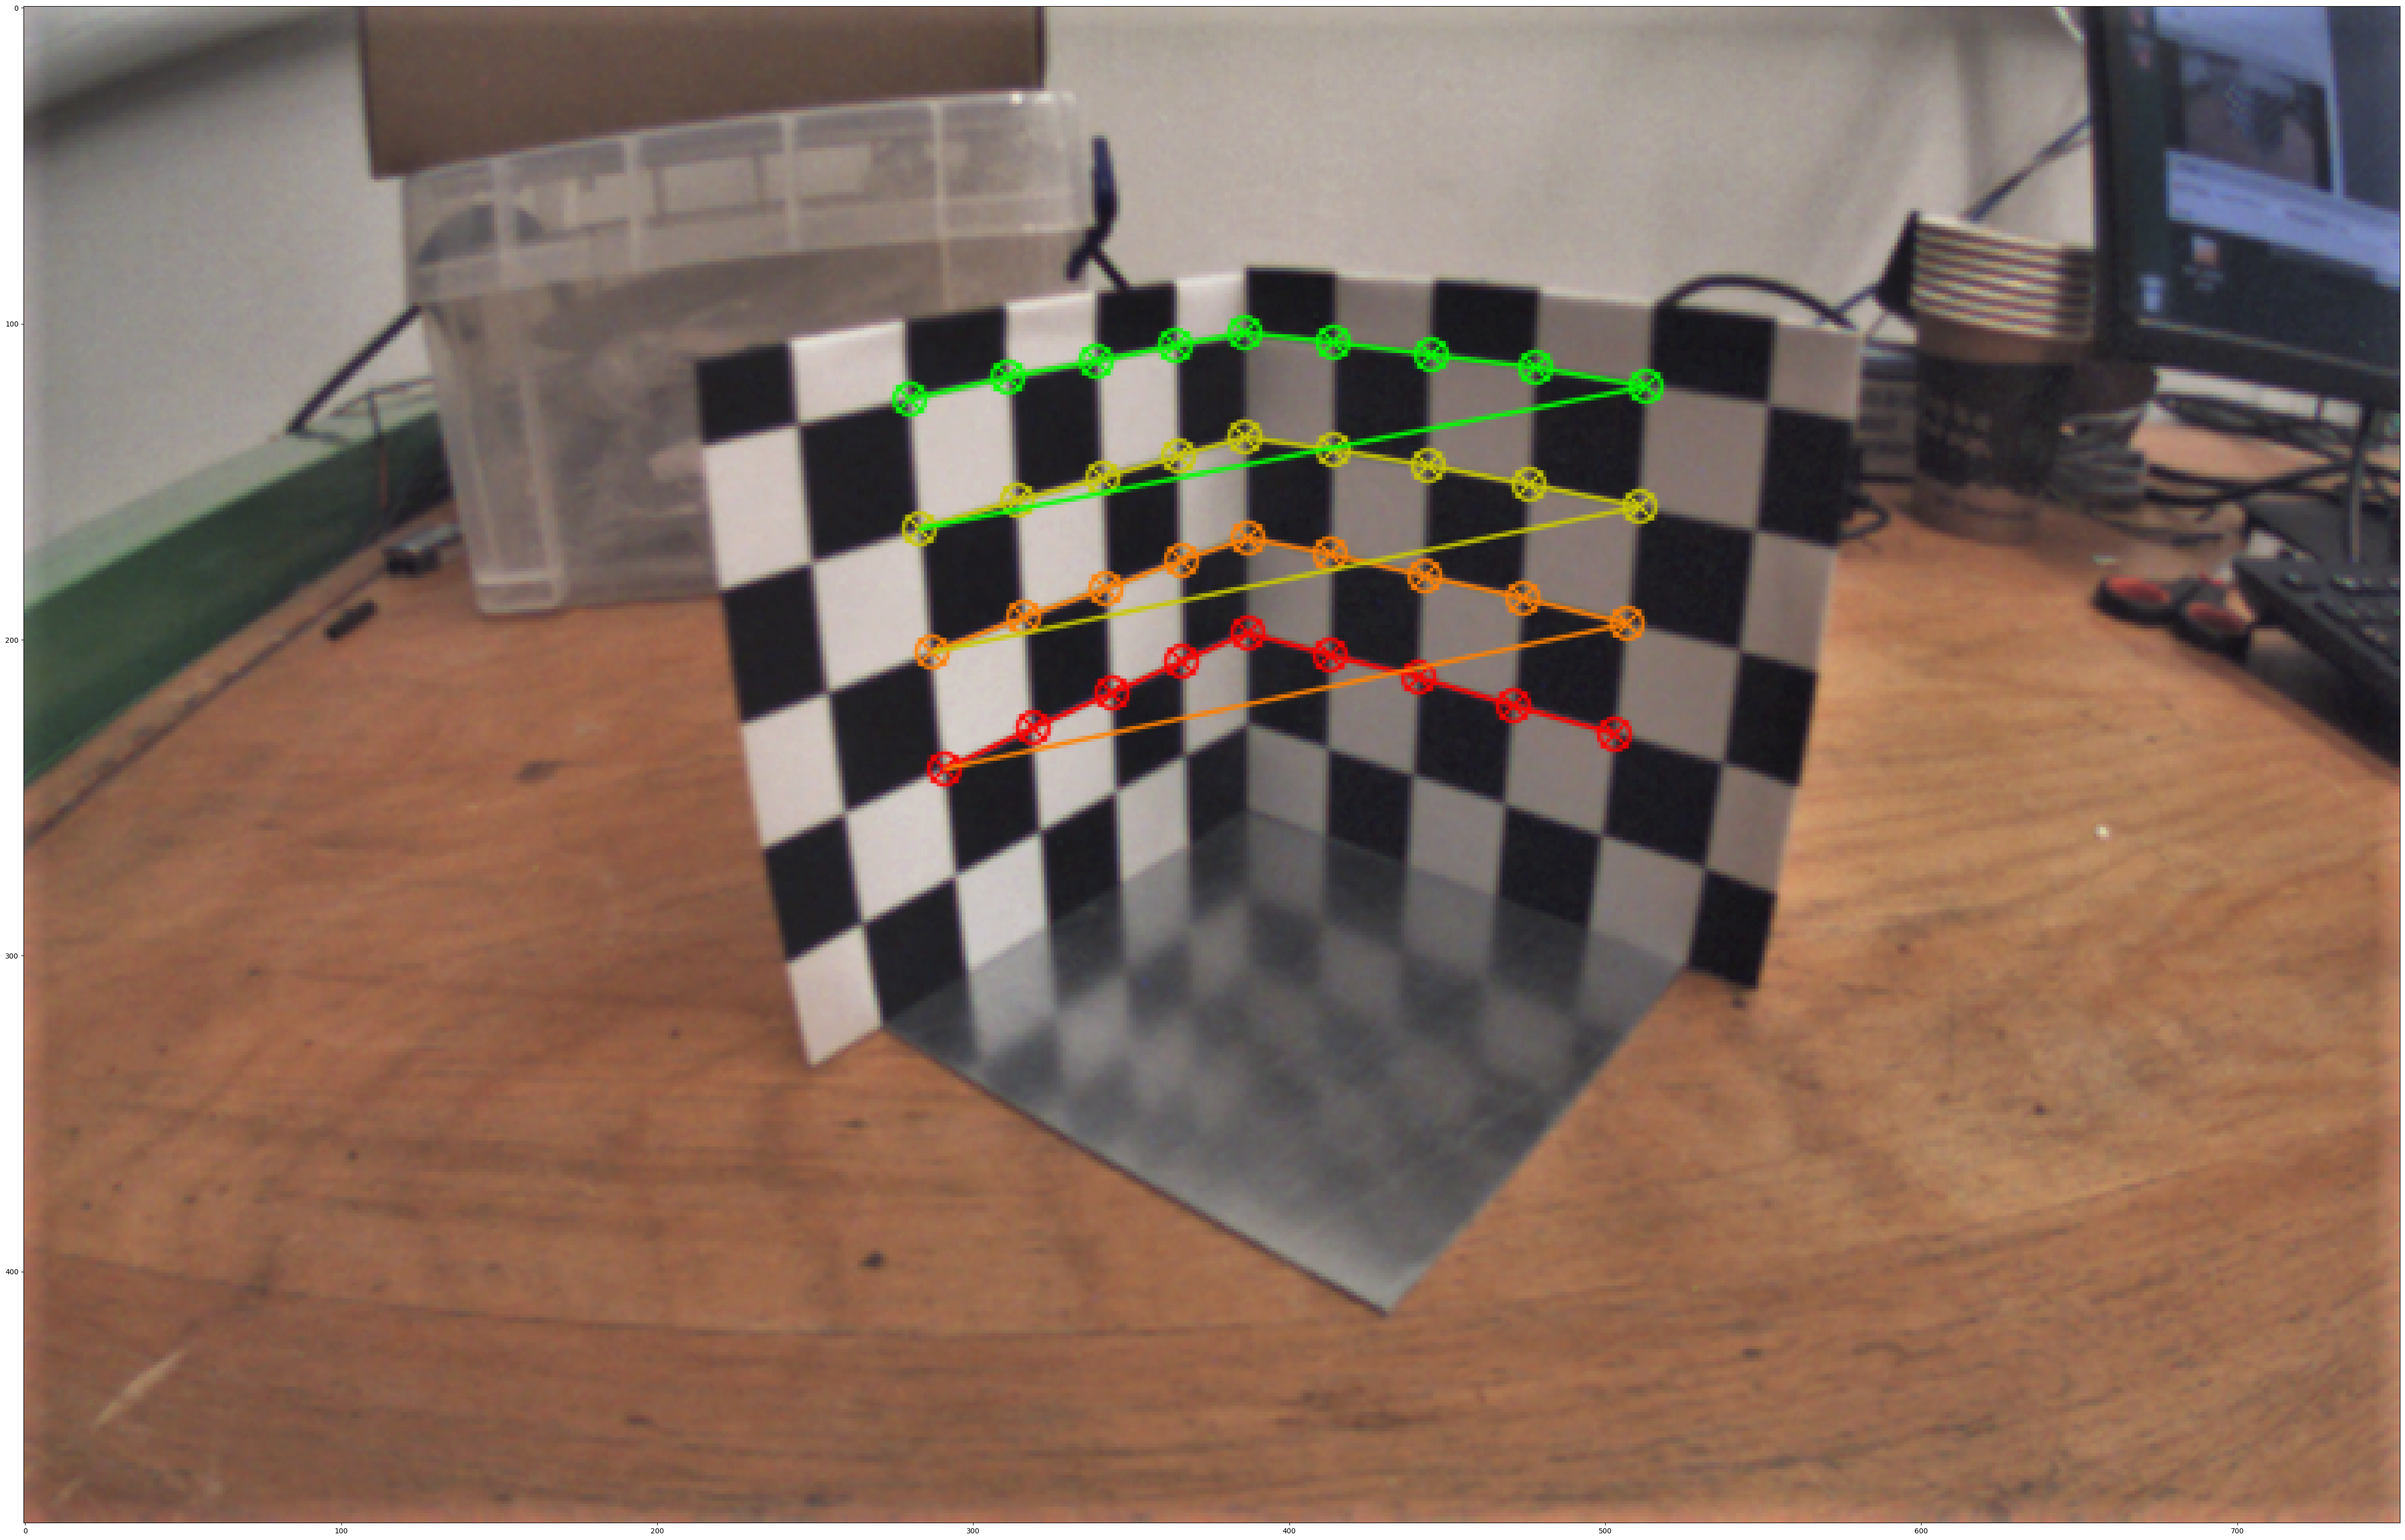

[[100   0 100]
 [ 80   0 100]
 [ 60   0 100]
 [ 40   0 100]
 [ 20   0 100]
 [  0   0 100]
 [  0  20 100]
 [  0  40 100]
 [  0  60 100]
 [100   0  80]
 [ 80   0  80]
 [ 60   0  80]
 [ 40   0  80]
 [ 20   0  80]
 [  0   0  80]
 [  0  20  80]
 [  0  40  80]
 [  0  60  80]
 [100   0  60]
 [ 80   0  60]
 [ 60   0  60]
 [ 40   0  60]
 [ 20   0  60]
 [  0   0  60]
 [  0  20  60]
 [  0  40  60]
 [  0  60  60]
 [100   0  40]
 [ 80   0  40]
 [ 60   0  40]
 [ 40   0  40]
 [ 20   0  40]
 [  0   0  40]
 [  0  20  40]
 [  0  40  40]
 [  0  60  40]]


In [3]:
def fix_world_points(checkerboard_size,checkerboard_length):
    # fix the world coordinate and get cooresponding keypoints in the world coordinates
    num_h=checkerboard_size[0]
    num_v=checkerboard_size[1]
    objp = []

    for i in range(num_v):
        for j in range(num_h):
            if j<6:
                # objp_point=[0,(5-j)*checkerboard_length,(5-i)*checkerboard_length]
                objp_point=[(5-j)*checkerboard_length,0,(5-i)*checkerboard_length]
                objp.append(objp_point)
            else:
                # objp_point=[(j-5)*checkerboard_length,0,(5-i)*checkerboard_length]
                objp_point=[0,(j-5)*checkerboard_length,(5-i)*checkerboard_length]
                objp.append(objp_point)


    return np.reshape(np.array(objp), (-1, 3))



img=cv2.imread('./data/camera_calib/30.png',cv2.IMREAD_COLOR)
img_points=[]
checkerboard_size=(9,4)   # Number of inner corners per a chessboard row and column is 11 and 5
checkerboard_length=20  # the board length is 16.13mm 

img_points=detect_keypoints(img,checkerboard_size)
world_points=fix_world_points(checkerboard_size,checkerboard_length)
# print('img_point',img_points)
print(world_points)

In [4]:
def coefficients_from_3d_2d(image: np.ndarray, world: np.ndarray):
    """Get coefficients for the polynomial equation.

    Args:
        image (np.ndarray): 2D vector (u, v).
        world (np.ndarray): 3D vector (x, y, z).

    Returns:
        np.ndarray: Coefficients of 2 rows of A (2x12).
    """
    # P = [p11 p12 p13 p14 p21 p22 p23 p24 p31 p32 p33 p34]
    res = np.zeros((2, 12))
    u, v = image
    x, y, z = world

    # p1 * X - u * p * X = 0
    res[0][0] = x
    res[0][1] = y
    res[0][2] = z
    res[0][3] = 1
    res[0][8] = -u * x
    res[0][9] = -u * y
    res[0][10] = -u * z
    res[0][11] = -u

    # p2 * X - v * p3 * X = 0
    res[1][4] = x
    res[1][5] = y
    res[1][6] = z
    res[1][7] = 1
    res[1][8] = -v * x
    res[1][9] = -v * y
    res[1][10] = -v * z
    res[1][11] = -v
    return res


def solve_P(A: np.ndarray):
    """Solve for P using A.

    Args:
        A (np.ndarray): Matrix A (2N, 12).

    Returns:
        np.ndarray: Matrix P (3x4).
    """
    _, _, V = np.linalg.svd(A)
    P = V[-1].reshape((3, 4))
    return P


def decompose_P(P: np.ndarray):
    """Decompose P into K, R, t.

    Args:
        P (np.ndarray): Matrix P (3x4).

    Returns:
        K (np.ndarray): Matrix K (3x3).
        R (np.ndarray): Matrix R (3x3).
        t (np.ndarray): Matrix t (3x1).
    """
    KR = P[:, :3]
    KKT = KR @ KR.T  # KKT = KR @ KR.T = K @ K.T
    norm=KKT[2, 2] 
    KKT /= norm
    sign = P[0][3] / np.abs(P[0][3])
    P /= np.sqrt(norm) * sign
    KR = P[:, :3]
    Kt = P[:, 3]

    u0 = KKT[0][2]
    v0 = KKT[1][2]
    fy = np.sqrt(KKT[1][1] - v0 ** 2)
    s = (KKT[0][1] - u0 * v0) / fy
    fx = np.sqrt(KKT[0][0] - u0 ** 2 - s ** 2)
    K = np.array([[fx, s, u0], [0, fy, v0], [0, 0, 1]])
    R = np.linalg.inv(K) @ KR  # R = K^-1 @ KR
    t = np.linalg.inv(K) @ Kt  # t = K^-1 @ Kt
    return K, R, t


def calibrate_3d_2d(image_points: np.ndarray, world_points: np.ndarray):
    """Calibrate 3D to 2D.

    Args:
        image_points (np.ndarray): 2D points (N, 2).
        world_points (np.ndarray): 3D points (N, 3).

    Returns:
        K (np.ndarray): Matrix K (3x3).
        R (np.ndarray): Matrix R (3x3).
        t (np.ndarray): Matrix t (3x1).
    """
    A = np.zeros((2 * image_points.shape[0], 12))
    for i in range(image_points.shape[0]):
        A[2 * i: 2 * i +
            2] = coefficients_from_3d_2d(image_points[i], world_points[i])
    P = solve_P(A)
    K, R, t = decompose_P(P)
    return K, R, t


# img_points = np.load('img_points.npy')
# world_points = np.load('world_points.npy')
K, R, t = calibrate_3d_2d(img_points, world_points)
print(K)#,R,t)

[[346.43747772 -23.60239852 451.32281386]
 [  0.         371.69771637 126.07983624]
 [  0.           0.           1.        ]]


In [5]:
# # To verify if your answer is correct, we can use the intrinsic matrix R, rotation vector, and translation vector to project a point from world coordiante to image coordinate
rvec, _=cv2.Rodrigues(R)
point3d=np.array([[100. , 0. ,  100.]])
proj,_=cv2.projectPoints(point3d,rvec,t,K,None)
print(proj)

[[[511.08742129 228.16868491]]]
